# Dropout을 통한 모델 향상
Cifar-10  
[참고 : Improving neural networks by preventing co-adaptation of feature detectors](https://arxiv.org/pdf/1207.0580.pdf)

1. 드롭아웃 없는 모델   
컨볼루션 레이어 3개 + 풀링레이어3개  
컨볼루션 레이어 - 5*5필터,배치사이즈64  
첫번째- 맥스풀링 + (3,3) + 스트라이드 2  
두,세번째 - 에버리지풀링 + (3,3) + 스트라이드 2  
마지막 - softmax레이어  

2. 드롭아웃 있는 모델  
위에 50% 드롭아웃 추가  

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 세트 불러오기

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, X_test.shape

170508288/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

- 이미지 확인

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

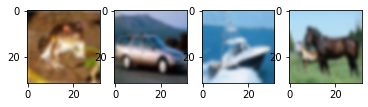

In [4]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")

plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")

plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")

plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")

plt.show()

- 정규화

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

- Y값을 원핫인코딩

In [6]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [7]:
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

### 드롭아웃 없는 모델의 경우 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten

In [9]:
model1 = Sequential([
                     Conv2D(64,(5,5),padding='same',input_shape=(32,32,3),activation='relu'),
                     MaxPooling2D((3,3),2),

                     Conv2D(64,(5,5),padding='same',activation='relu'),
                     AveragePooling2D((3,3),2),

                     Conv2D(64,(5,5),padding='same',activation='relu'),
                     AveragePooling2D((3,3),2),
                     
                     Flatten(),
                     Dense(10,activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        102464    
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          102464    
_________________________________________________________________
average_pooling2d_1 (Average (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [10]:
model1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history1 = model1.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs = 100, batch_size = 64, verbose = 0
)

In [12]:
model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3608 - accuracy: 0.7222


[2.360792875289917, 0.7221999764442444]

### 드롭아웃 있는 모델의 경우

In [13]:
from tensorflow.keras.layers import Dropout

In [14]:
model2 = Sequential([
                     Conv2D(64,(5,5),padding='same',input_shape=(32,32,3),activation='relu'),
                     MaxPooling2D((3,3),2),

                     Conv2D(64,(5,5),padding='same',activation='relu'),
                     AveragePooling2D((3,3),2),

                     Conv2D(64,(5,5),padding='same',activation='relu'),
                     AveragePooling2D((3,3),2),
                     
                     Flatten(),
                     Dropout(0.5),
                     Dense(10,activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        102464    
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          102464    
_________________________________________________________________
average_pooling2d_3 (Average (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [15]:
model2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history2 = model2.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs = 100, batch_size = 64, verbose = 0
)

In [17]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1873 - accuracy: 0.7573


[1.187346339225769, 0.7573000192642212]

### 드롭아웃 있는 모델의 경우2

In [19]:
model3 = Sequential([
                     Conv2D(64,(5,5),padding='same',input_shape=(32,32,3),activation='relu'),
                     MaxPooling2D((3,3),2),
                     Dropout(0.25),

                     Conv2D(64,(5,5),padding='same',activation='relu'),
                     AveragePooling2D((3,3),2),
                     Dropout(0.25),

                     Conv2D(64,(5,5),padding='same',activation='relu'),
                     AveragePooling2D((3,3),2),
                     Dropout(0.25),
                     
                     Flatten(),
                     Dropout(0.5),
                     Dense(10,activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        102464    
_________________________________________________________________
average_pooling2d_4 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)         

In [21]:
model3.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history3 = model3.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs = 100, batch_size = 64, verbose = 0
)

In [23]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7131 - accuracy: 0.7743


[0.7131131291389465, 0.7742999792098999]

### 시각화

In [24]:
model1_vloss = history1.history['val_loss']
model2_vloss = history2.history['val_loss']
model3_vloss = history3.history['val_loss']
x_len = np.arange(len(model1_vloss))

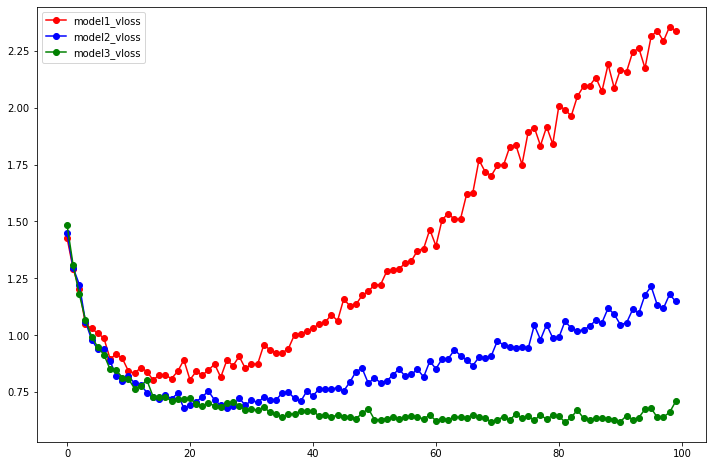

In [25]:
plt.figure(figsize=(12,8))
plt.plot(x_len, model1_vloss, 'ro-', label='model1_vloss')
plt.plot(x_len, model2_vloss, 'bo-', label='model2_vloss')
plt.plot(x_len, model3_vloss, 'go-', label='model3_vloss')
plt.legend()
plt.show()